In [1]:
# Install package

%%capture
!pip install bioinfokit

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [8]:
# Import data

df = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/cosmetics.csv')
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [12]:
df[df.select_dtypes('Int64').columns].apply(pd.to_numeric, errors='ignore').convert_dtypes()

,Price,Combination,Dry,Normal,Oily,Sensitive
0,175,1,1,1,1,1
1,179,1,1,1,1,1
2,68,1,1,1,1,0
3,175,1,1,1,1,1
4,38,1,1,1,1,1
...,...,...,...,...,...,...
1467,35,1,1,1,1,1
1468,48,0,0,0,0,0
1469,54,0,0,0,0,0
1470,20,0,0,0,0,0


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
for col in df.select_dtypes(include='object'):
  print(f'{col}: {df[col].nunique()}')

Label: 6
Brand: 116
Name: 1472
Ingredients: 1334


In [5]:
df.isnull().sum()

,0
Label,0
Brand,0
Name,0
Price,0
Rank,0
Ingredients,0
Combination,0
Dry,0
Normal,0
Oily,0


In [6]:
df.duplicated().sum()

0

In [31]:
# Create a df copy
df_copy = df.copy()

# Split the 'Ingredients' column into a list
df_copy['Ingredients'] = df['Ingredients'].str.split(', ')

# Explode the 'Ingredients' list into multiple rows (one ingredient per row)
df_copy_exploded = df_copy.explode('Ingredients')

# Perform one-hot encoding
df_copy_encoded = pd.get_dummies(df_copy_exploded['Ingredients'], dtype=int)

# Sum the one-hot encoded columns for each original row to combine the exploded rows
df_copy_result = df_copy_encoded.groupby(df_copy_exploded.index).sum()

# Concatenate the one-hot encoded ingredients back with the original DataFrame if needed
df_copy = pd.concat([df_copy.drop(columns=['Ingredients']), df_copy_result], axis=1)

In [32]:
df_copy.drop(columns=['Brand', 'Name'], inplace=True, axis=1)

In [33]:
df_copy.Label.value_counts()

,count
Label,
Moisturizer,298
Cleanser,281
Face Mask,266
Treatment,248
Eye cream,209
Sun protect,170


In [34]:
# One hot encode Label

df_copy_label = pd.get_dummies(df_copy['Label'], dtype=int)

In [35]:
# Concatenate the one-hot encoded ingredients back with the original DataFrame if needed

df_copy = pd.concat([df_copy.drop(columns=['Label']), df_copy_label], axis=1)

In [36]:
df_copy

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,,Aloe Barbadensis (Aloe Vera) Leaf Juice,#NAME?,...,whose flower is Alkyl Acrylate Crosspolymer,xanthan Gum,yeast extract,yellow 10/CI 47005,Cleanser,Eye cream,Face Mask,Moisturizer,Sun protect,Treatment
0,175,4.1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,179,4.1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,68,4.4,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,175,3.8,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,4.1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,35,3.9,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1468,48,3.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1469,54,3.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1470,20,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Using TSNE and Modelling with DBSCAN

In [37]:
# Using tsne on data

tsne = TSNE(n_components=2).fit_transform(df_copy)
cluster.tsneplot(score=tsne)

In [38]:
# import DBSCAN

from sklearn.cluster import DBSCAN

In [50]:
model = DBSCAN(eps=10, min_samples=20)
model.fit(df_copy)
clusters = model.fit_predict(df_copy)
set(clusters)

{-1, 0, 1}

In [51]:
# Create new dataframe

df_new = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
df_new['cluster'] = clusters
df_new

,tsne1,tsne2,cluster
0,58.625896,-2.362786,-1
1,58.899452,-2.211723,-1
2,23.236029,10.557605,0
3,58.653515,-2.363247,-1
4,-12.403774,-11.765233,0
...,...,...,...
1467,-14.329597,-3.274782,0
1468,11.697971,-17.937075,0
1469,6.946073,16.156944,0
1470,-41.228649,2.143186,0


In [52]:
df_new.cluster.value_counts()

,count
cluster,
0,1373
-1,77
1,22


### Visualize clusters

<Axes: xlabel='tsne1', ylabel='tsne2'>

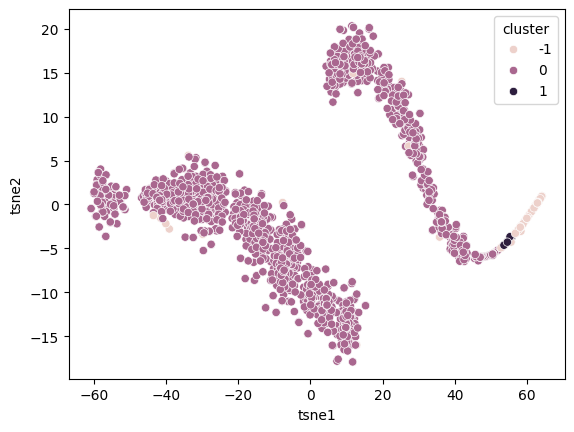

In [54]:
# scatterplot

sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_new)